In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('font', **{'family': 'serif', 'serif': ['Cambria', 'Times New Roman']})

import seaborn as sns

In [2]:
%load_ext watermark

In [3]:
%watermark -h -v -m -p pandas,numpy,matplotlib

CPython 3.6.0
IPython 5.1.0

pandas 0.19.2
numpy 1.11.3
matplotlib 2.0.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 42 Stepping 7, GenuineIntel
CPU cores  : 8
interpreter: 64bit
host name  : user-PC


In [4]:
pd.options.display.max_rows = 8

In [5]:
h5root = '..\\h5 files\\'
chartdir = 'C:\\Users\\user\\Documents\\Agent-Based Models\\Charts\\'

In [22]:
h5subdir = 'Trial 13\\'
h5file = 'smallcap_%d.h5' % 1

In [23]:
h5in = '%s%s%s' % (h5root, h5subdir, h5file)

In [24]:
indf = pd.read_hdf(h5in, 'tob')
indf

,ask_size,best_ask,best_bid,bid_size,timestamp
0,1,1000825,999100,1,0
1,1,1000825,1000760,1,1
2,1,1000825,1000760,1,1
3,1,1000825,1000775,1,2
...,...,...,...,...,...
28349,7,1001520,1001460,8,100000
28350,6,1001520,1001460,8,100000
28351,5,1001520,1001460,8,100000
28352,5,1001520,1001460,8,100000


In [25]:
indf = indf.assign(spread = indf.best_ask - indf.best_bid)
last_df = indf.groupby('timestamp').last()
indf, last_df

(       ask_size  best_ask  best_bid  bid_size  timestamp  spread
 0             1   1000825    999100         1          0    1725
 1             1   1000825   1000760         1          1      65
 2             1   1000825   1000760         1          1      65
 3             1   1000825   1000775         1          2      50
 ...         ...       ...       ...       ...        ...     ...
 28349         7   1001520   1001460         8     100000      60
 28350         6   1001520   1001460         8     100000      60
 28351         5   1001520   1001460         8     100000      60
 28352         5   1001520   1001460         8     100000      60
 
 [1420757 rows x 6 columns],
            ask_size  best_ask  best_bid  bid_size  spread
 timestamp                                                
 0                 1   1000825    999100         1    1725
 1                 1   1000825   1000760         1      65
 2                 1   1000805   1000775         1      30
 3            

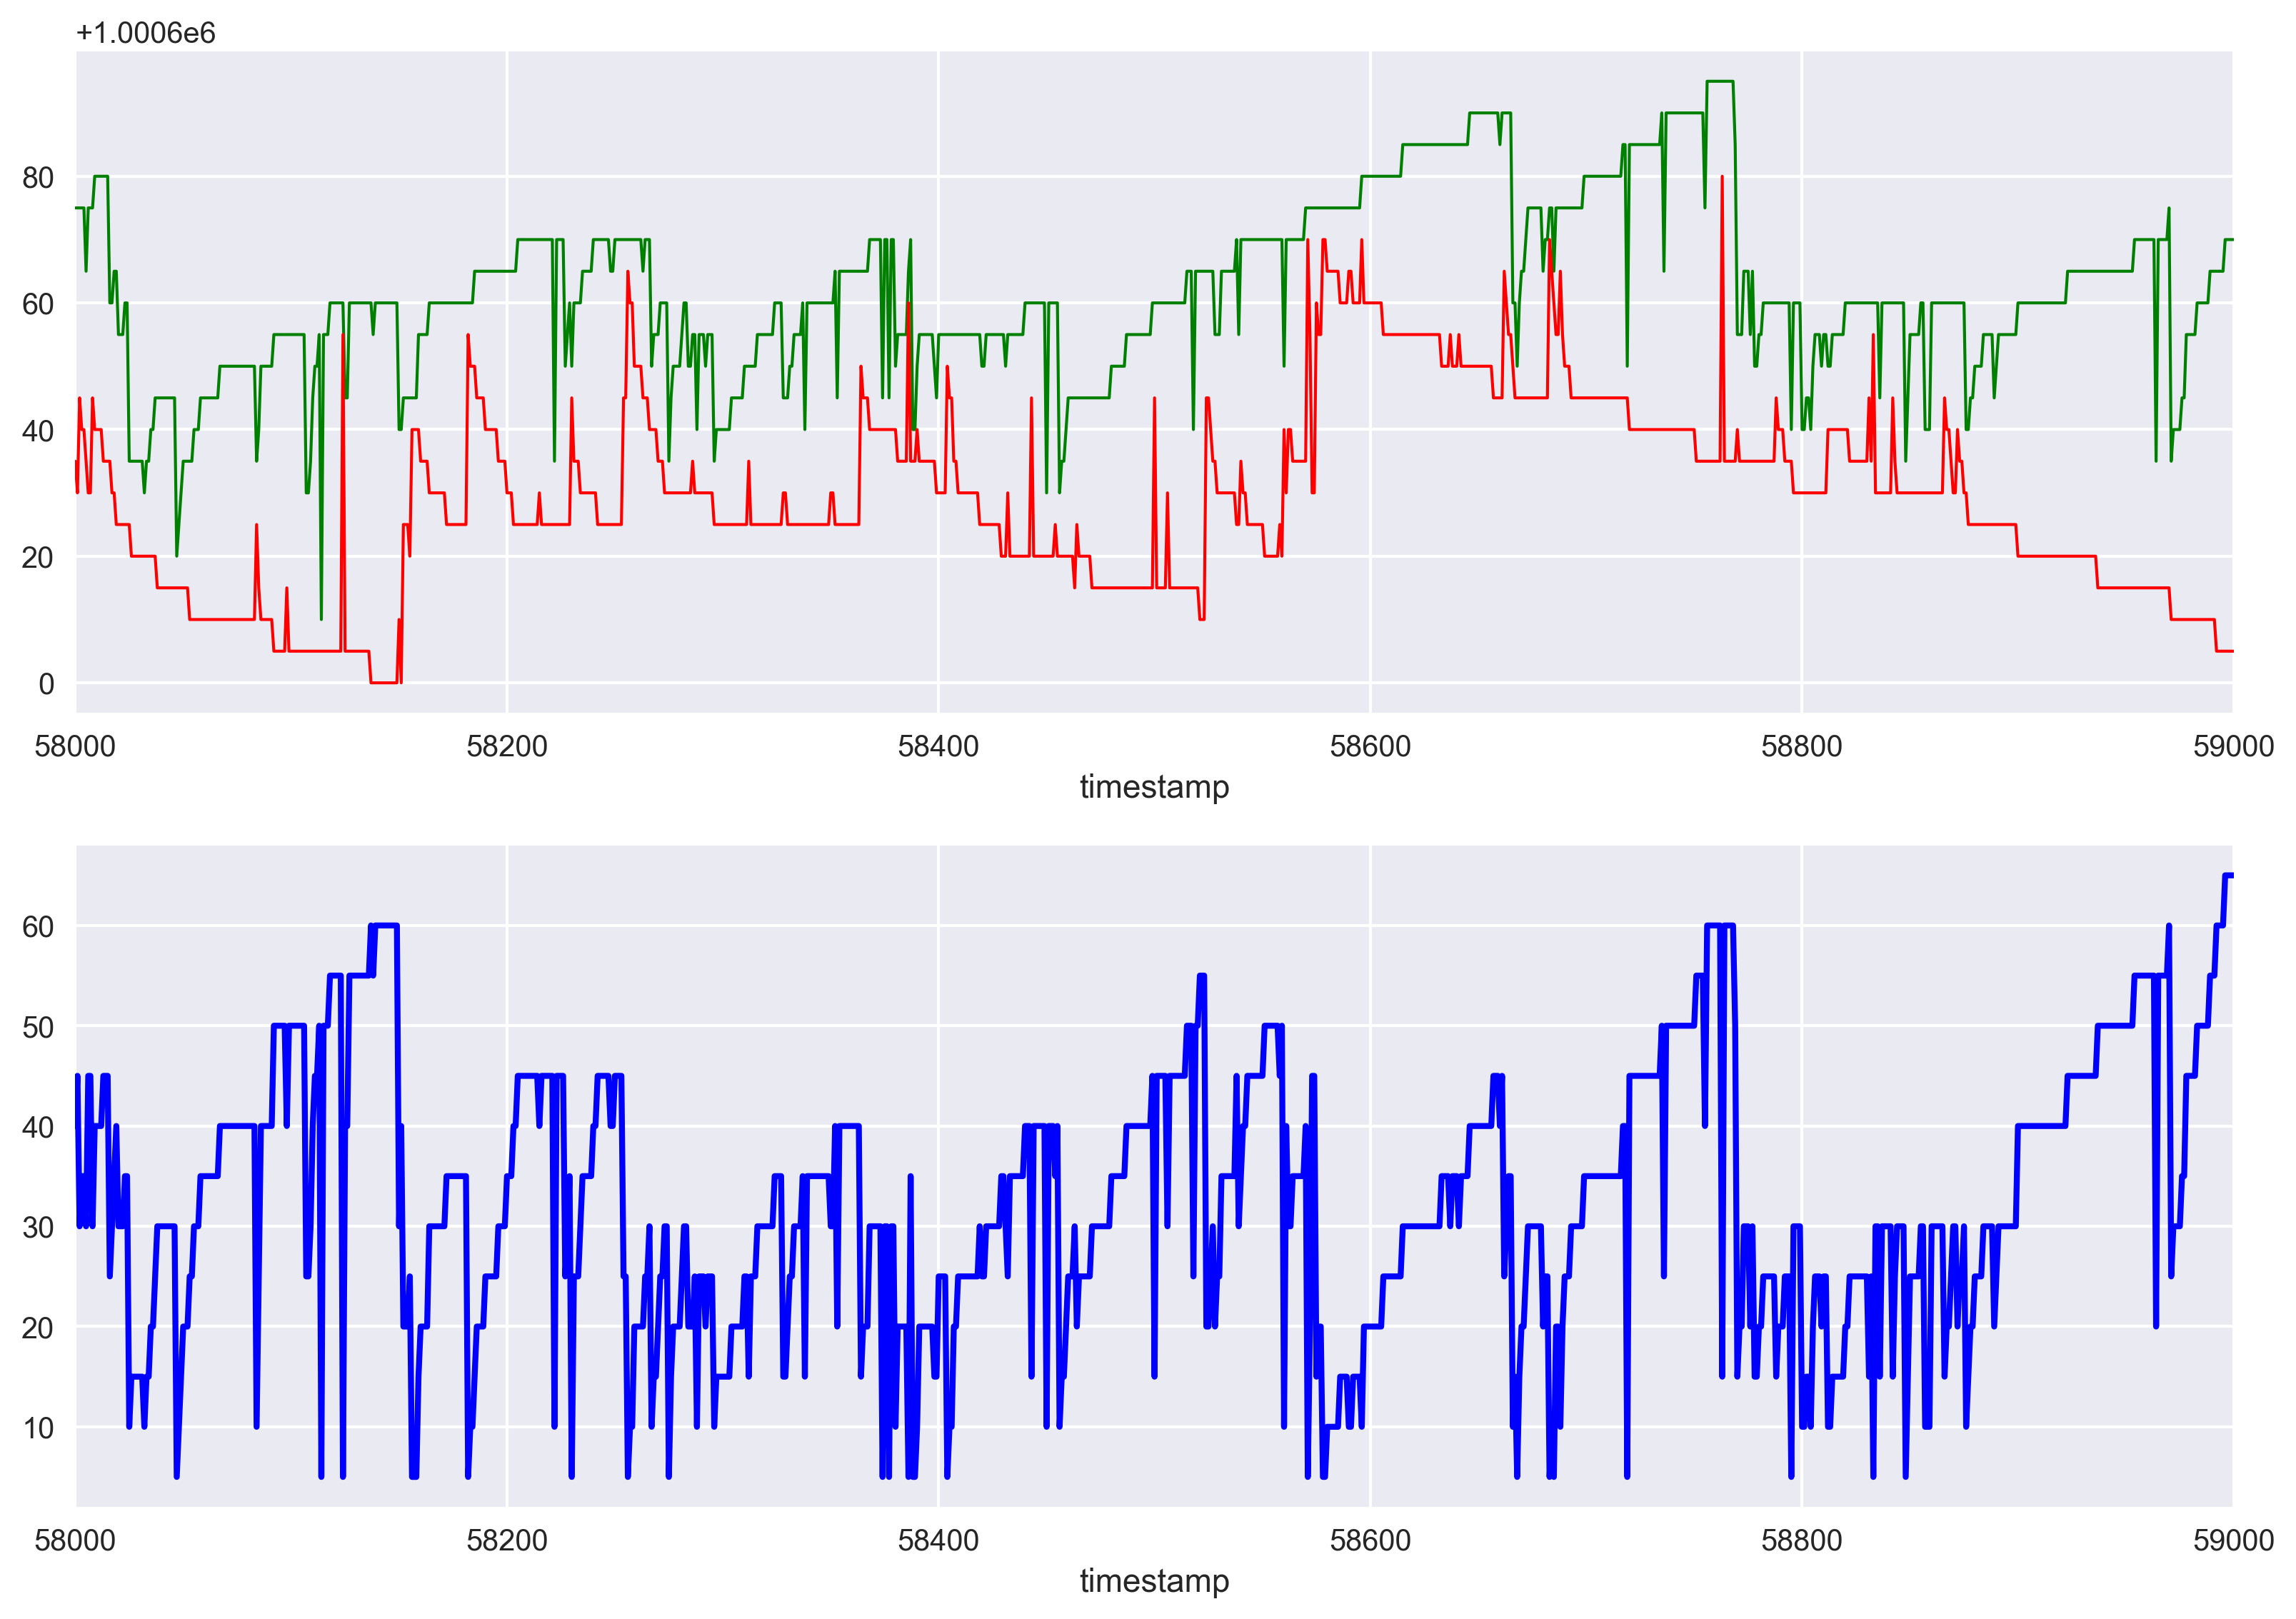

In [26]:
spread_df_plot = last_df.loc[58000:59000]
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(211)
sns.tsplot(spread_df_plot.best_ask, ax=ax1, time=spread_df_plot.index, color='Green', lw=1)
sns.tsplot(spread_df_plot.best_bid, ax=ax1, time=spread_df_plot.index, color='Red', lw=1)
ax2 = fig.add_subplot(212)
sns.tsplot(spread_df_plot.spread, ax=ax2, time=spread_df_plot.index, color='Blue', lw=2)
plt.show()

In [27]:
last_df.loc[50:][['spread', 'best_bid', 'best_ask']].describe()

,spread,best_bid,best_ask
count,99951.000000,9.995100e+04,9.995100e+04
mean,54.869136,1.000887e+06,1.000942e+06
std,27.963196,2.469018e+02,2.478344e+02
min,5.000000,1.000425e+06,1.000455e+06
25%,35.000000,1.000725e+06,1.000780e+06
50%,50.000000,1.000810e+06,1.000865e+06
75%,70.000000,1.000955e+06,1.001020e+06
max,190.000000,1.001530e+06,1.001540e+06


In [28]:
indf[indf.timestamp>50][['spread', 'best_bid', 'best_ask']].describe()

,spread,best_bid,best_ask
count,1.420258e+06,1.420258e+06,1.420258e+06
mean,5.477061e+01,1.000887e+06,1.000942e+06
std,2.804797e+01,2.468785e+02,2.477964e+02
min,5.000000e+00,1.000425e+06,1.000455e+06
25%,3.500000e+01,1.000725e+06,1.000780e+06
50%,5.000000e+01,1.000810e+06,1.000865e+06
75%,7.000000e+01,1.000955e+06,1.001020e+06
max,1.900000e+02,1.001530e+06,1.001540e+06


In [29]:
last_df = last_df.reindex(index=pd.Index(np.arange(start=0, stop=100001, step=1)))
last_df = last_df.assign(qmid = (last_df.best_ask + last_df.best_bid)/2)
last_df.ffill(inplace=True)
last_df = last_df.assign(ret = 100*last_df.qmid.pct_change())
last_df = last_df.assign(abs_ret = np.abs(last_df.ret))
last_df = last_df.loc[11:]
last_df

,ask_size,best_ask,best_bid,bid_size,spread,qmid,ret,abs_ret
11,3,1000790,1000770,1,20,1000780.0,0.00000,0.00000
12,1,1000780,1000775,1,5,1000777.5,-0.00025,0.00025
13,1,1000780,1000765,5,15,1000772.5,-0.00050,0.00050
14,2,1000790,1000765,5,25,1000777.5,0.00050,0.00050
...,...,...,...,...,...,...,...,...
99997,9,1001520,1001460,9,60,1001490.0,0.00000,0.00000
99998,7,1001520,1001460,8,60,1001490.0,0.00000,0.00000
99999,6,1001520,1001460,8,60,1001490.0,0.00000,0.00000
100000,5,1001520,1001460,8,60,1001490.0,0.00000,0.00000


In [30]:
lags = []
autocorr = []
abs_autocorr = []
for i in range(1,51):
    ac = last_df.ret.autocorr(lag = i)
    aac = last_df.abs_ret.autocorr(lag = i)
    lags.append(i)
    autocorr.append(ac)
    abs_autocorr.append(aac)

ar_df = pd.DataFrame({'lag': lags, 'autocorrelation': autocorr, 'autocorrelation_abs': abs_autocorr})
ar_df.set_index('lag', inplace=True)
clustering_constant = ar_df.autocorrelation_abs.sum()/ar_df.autocorrelation.sum()
np.abs(clustering_constant)

2.0002620695187203

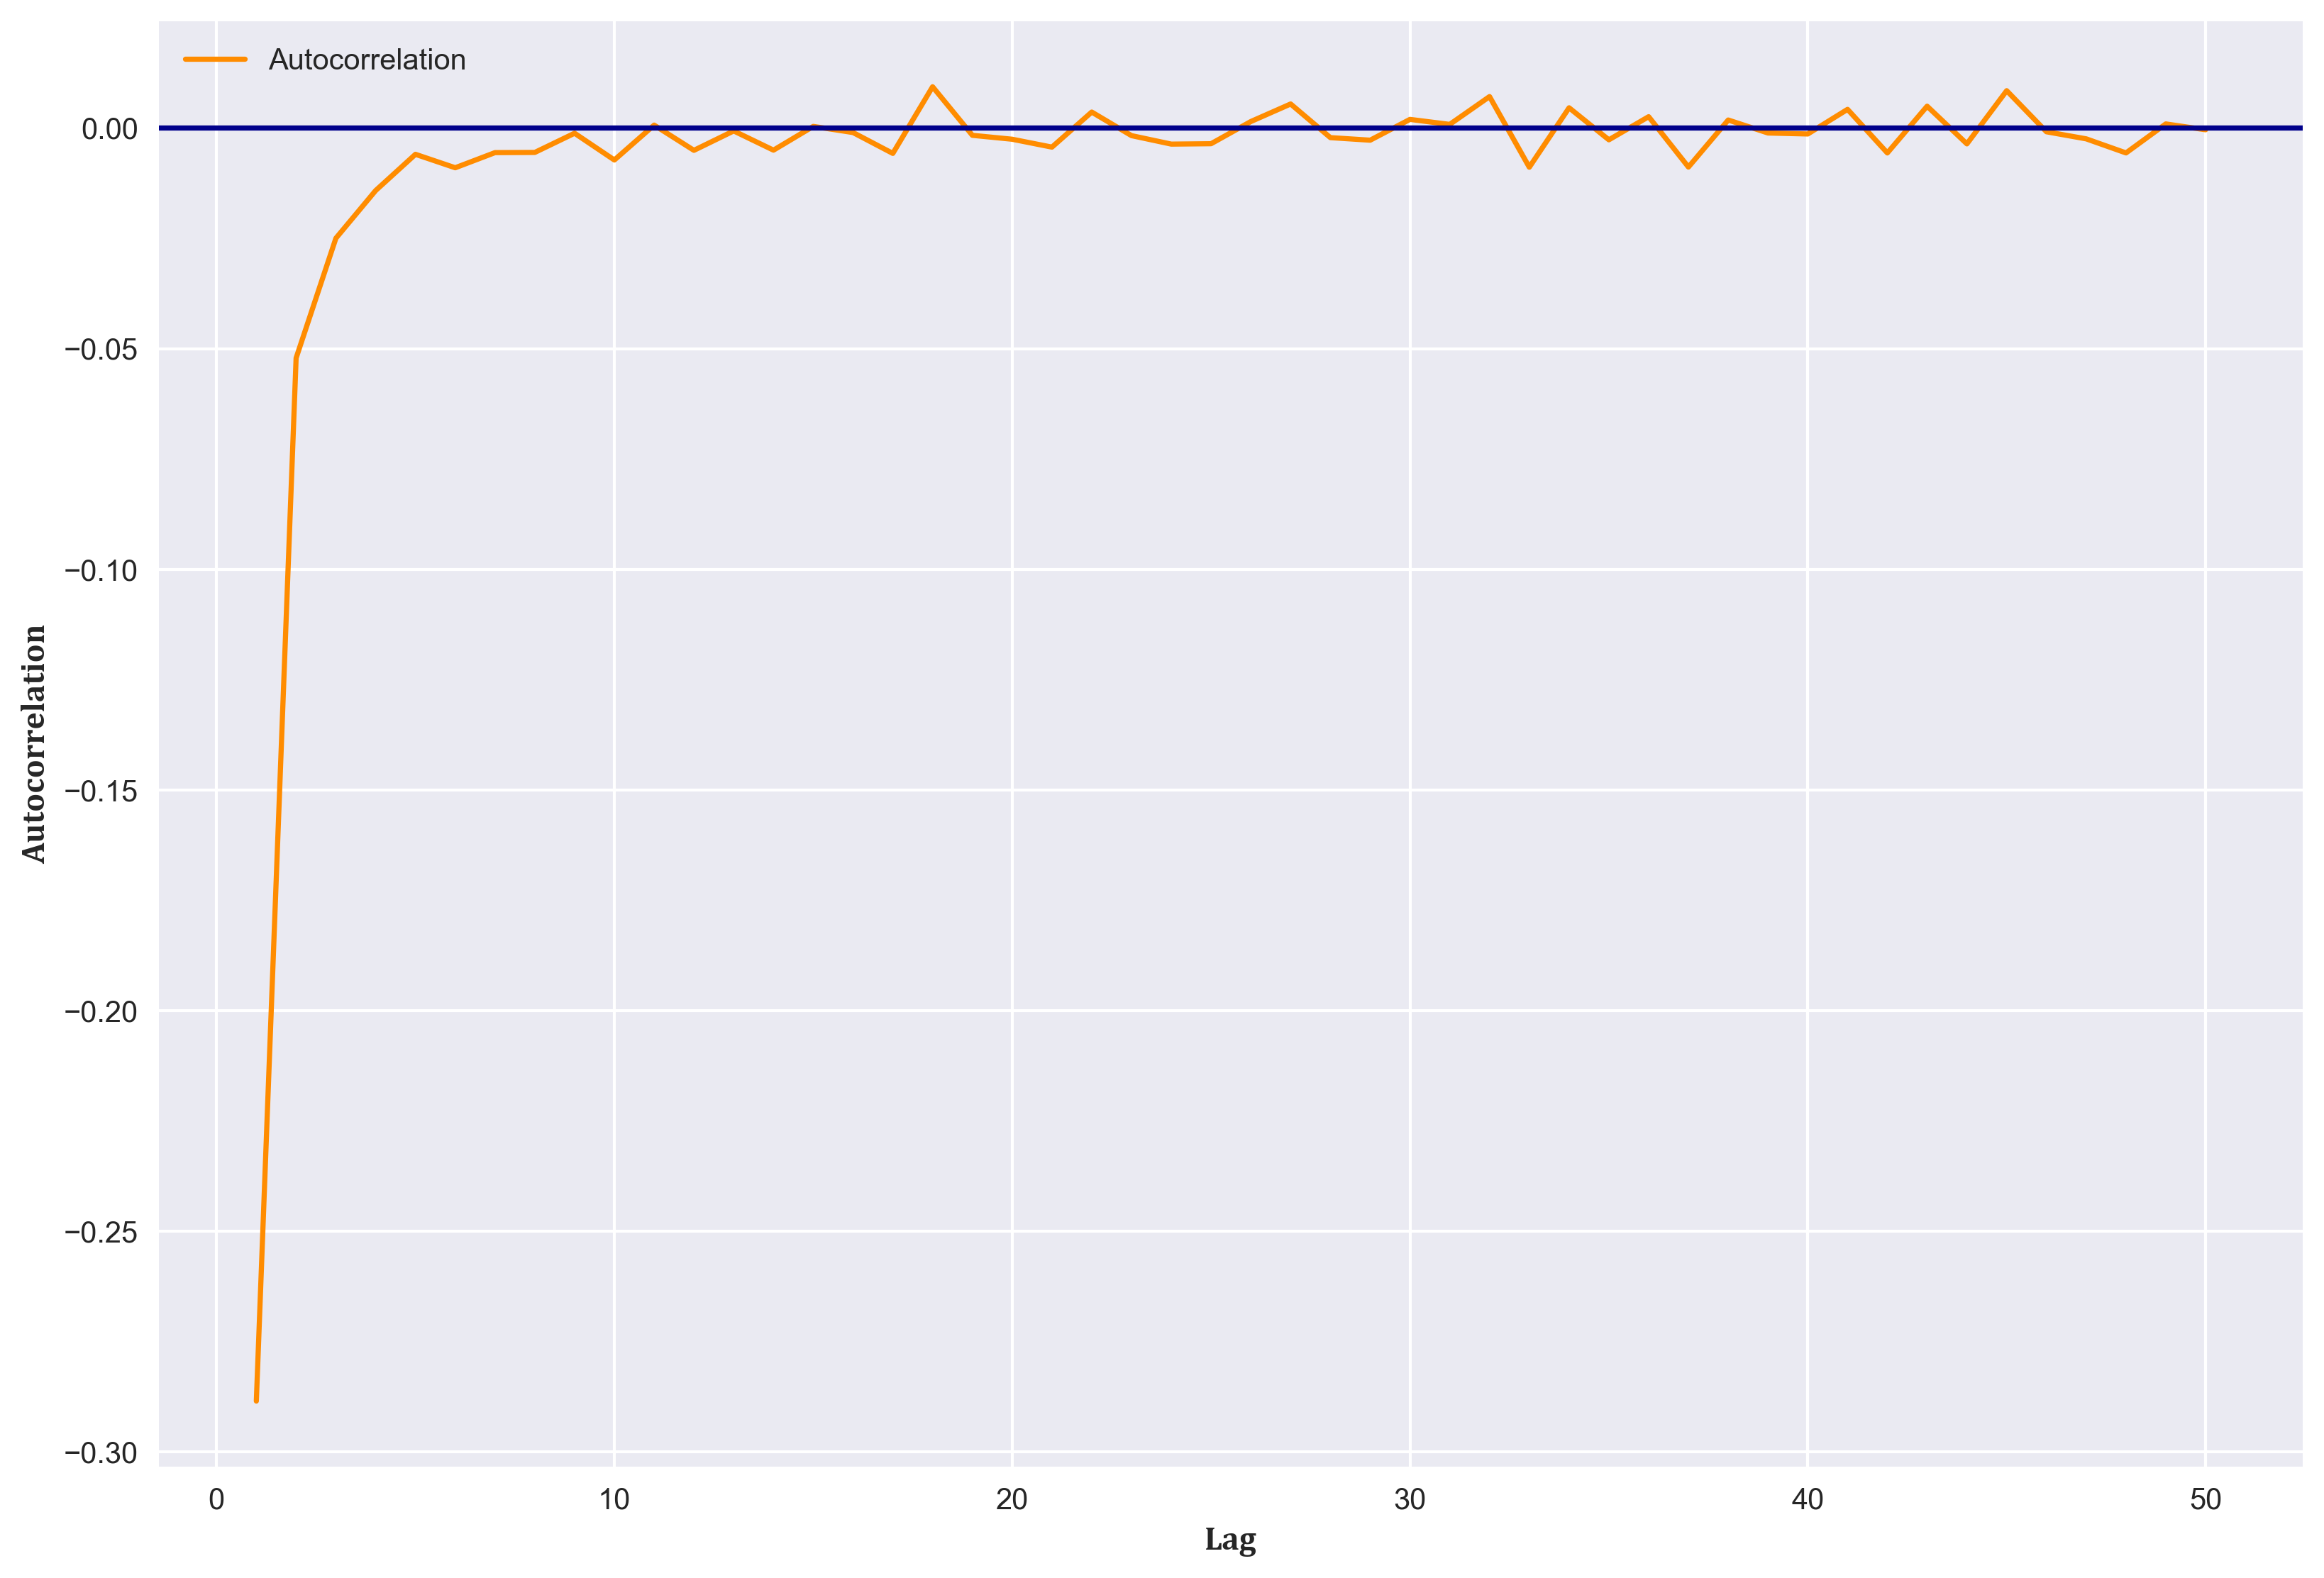

In [31]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(ar_df['autocorrelation'], linestyle='solid', color='DarkOrange', marker='None', label='Autocorrelation')
ax1.axhline(y=0, linestyle='solid', color='DarkBlue', marker='None')
ax1.set_xlabel('Lag', family='Cambria')
ax1.set_ylabel('Autocorrelation', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%sac1q.png' % chartdir)
plt.show()

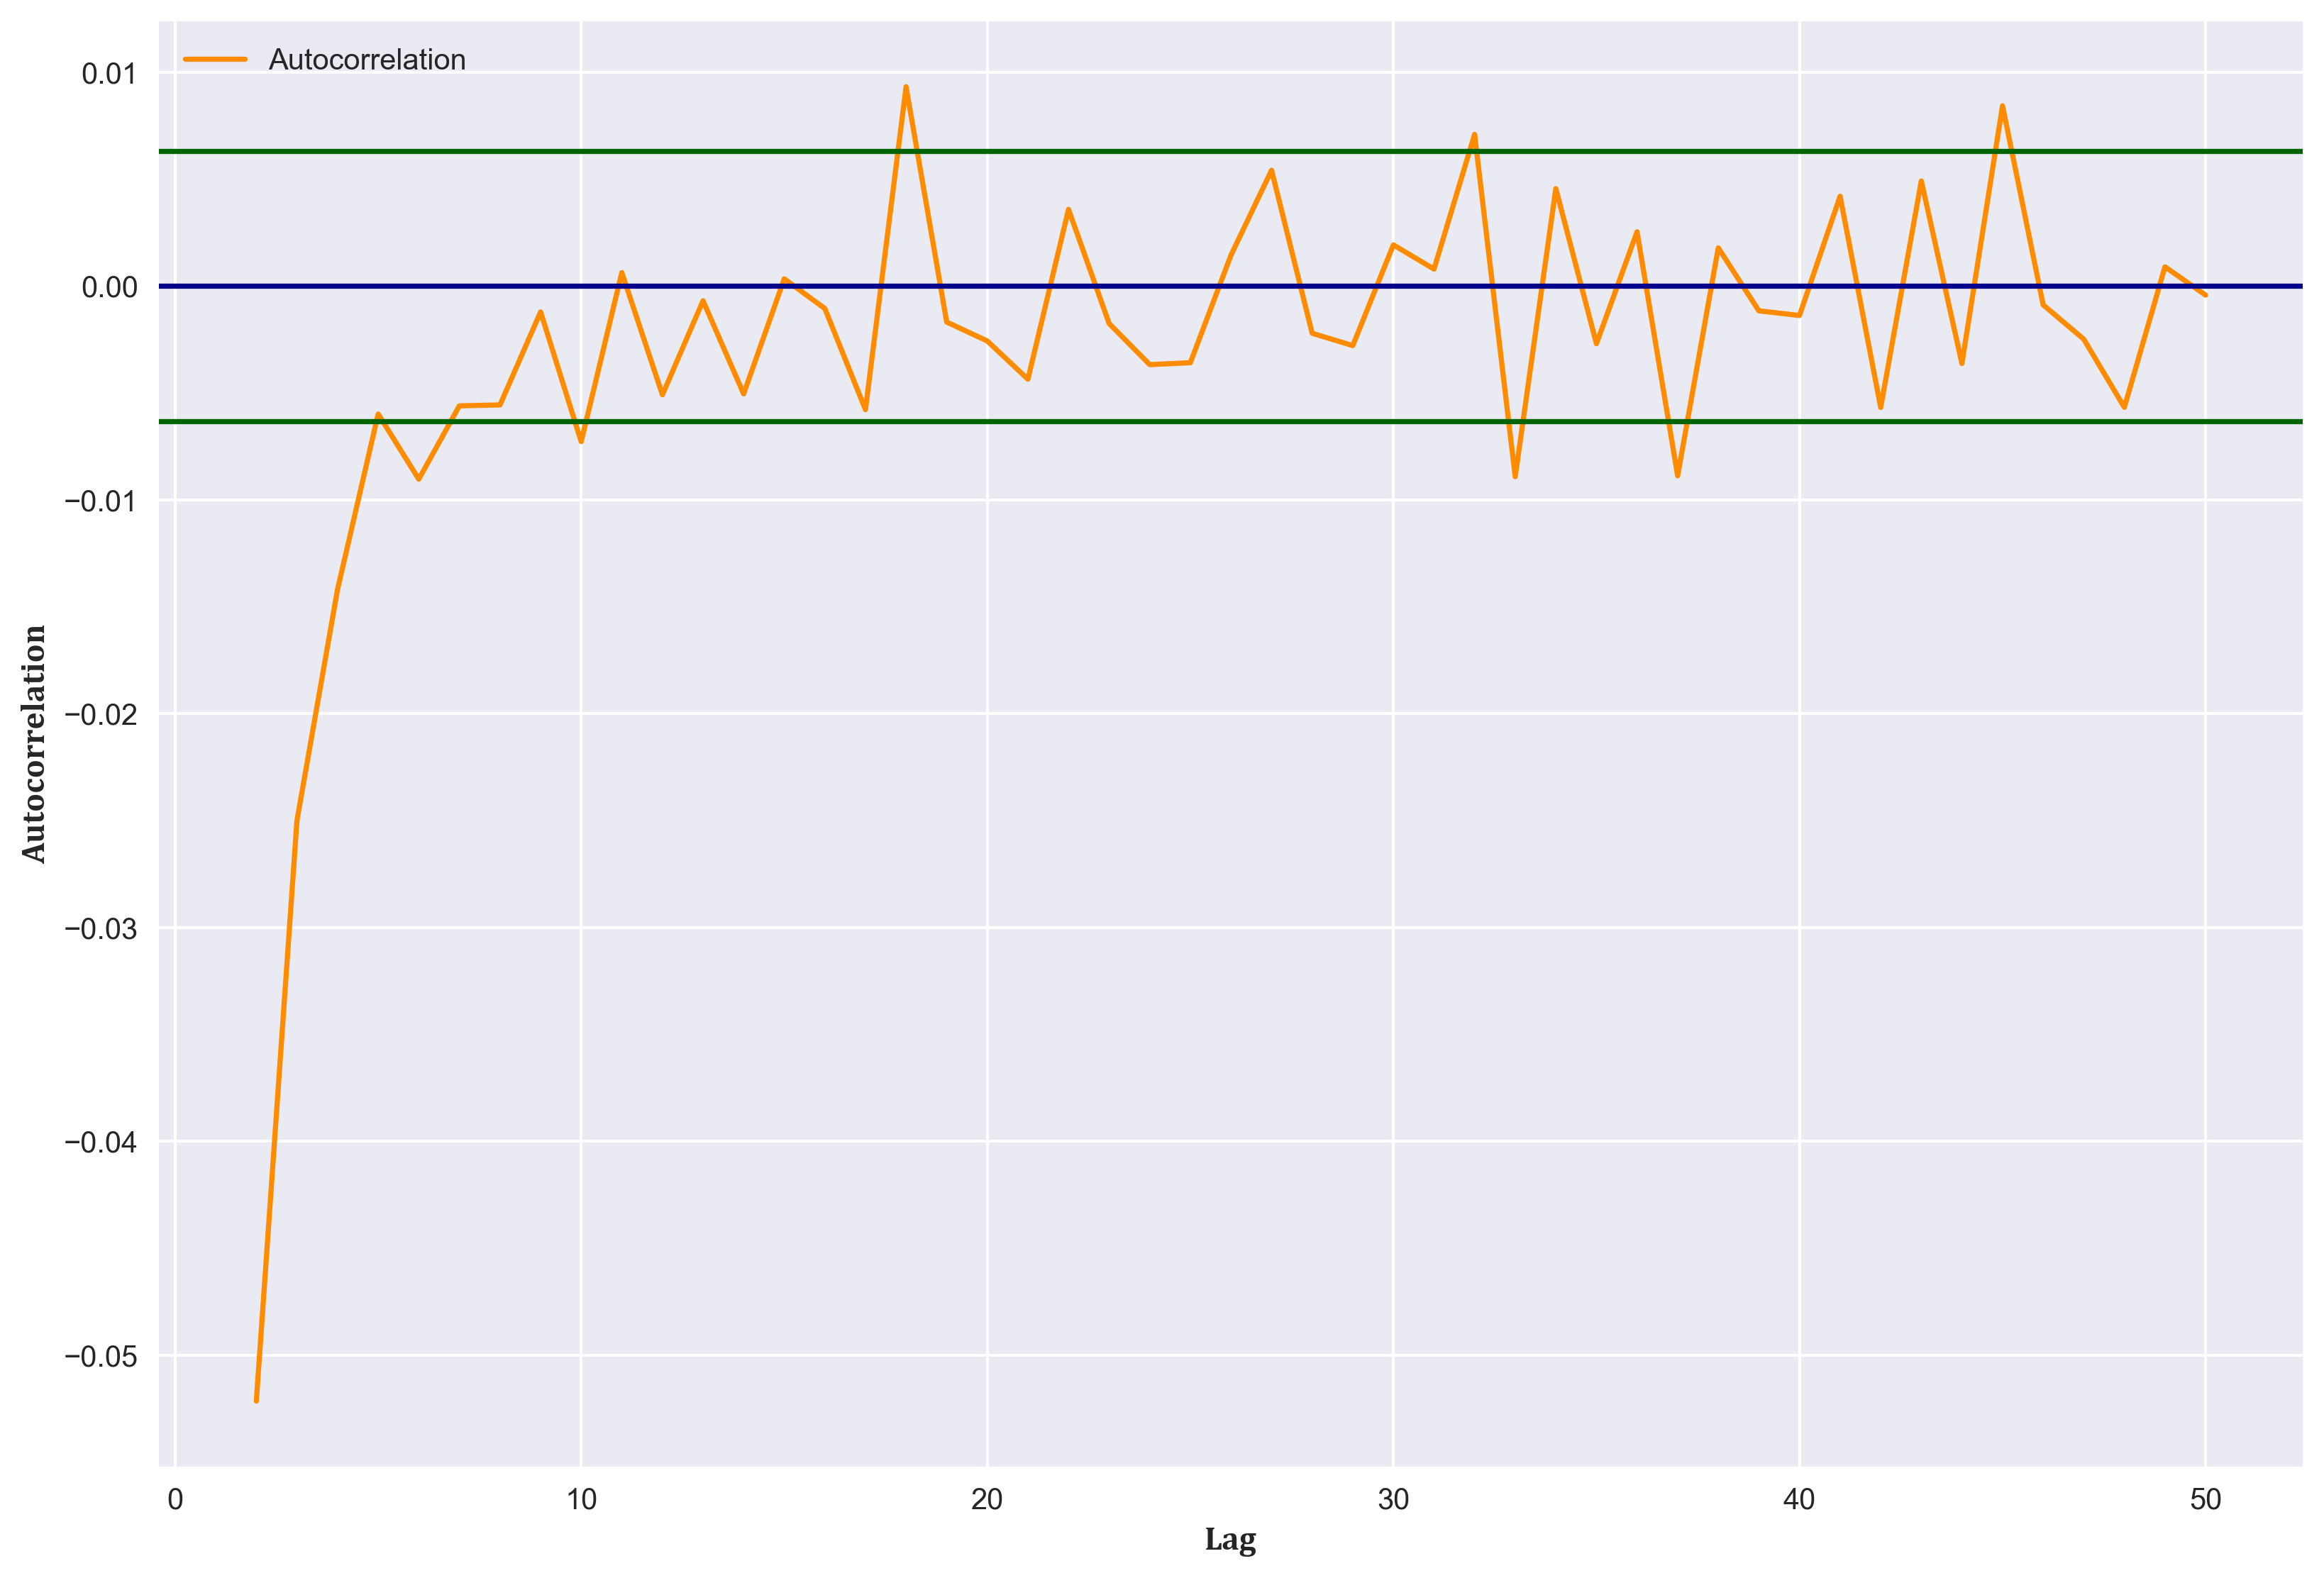

In [32]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(ar_df.loc[2:]['autocorrelation'], linestyle='solid', color='DarkOrange', marker='None', label='Autocorrelation')
ax1.axhline(y=0, linestyle='solid', color='DarkBlue', marker='None')
ax1.axhline(y=2/np.sqrt(last_df.ret.count()), linestyle='solid', color='DarkGreen', marker='None')
ax1.axhline(y=-2/np.sqrt(last_df.ret.count()), linestyle='solid', color='DarkGreen', marker='None')
ax1.set_xlabel('Lag', family='Cambria')
ax1.set_ylabel('Autocorrelation', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%sac2q.png' % chartdir)
plt.show()

In [33]:
last_df.ret.mean(), last_df.ret.std(), last_df.ret.kurtosis(), last_df.ret.skew()

(7.106877230523771e-07,
 0.0005332382407825264,
 32.729103593595752,
 0.045014575187834791)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


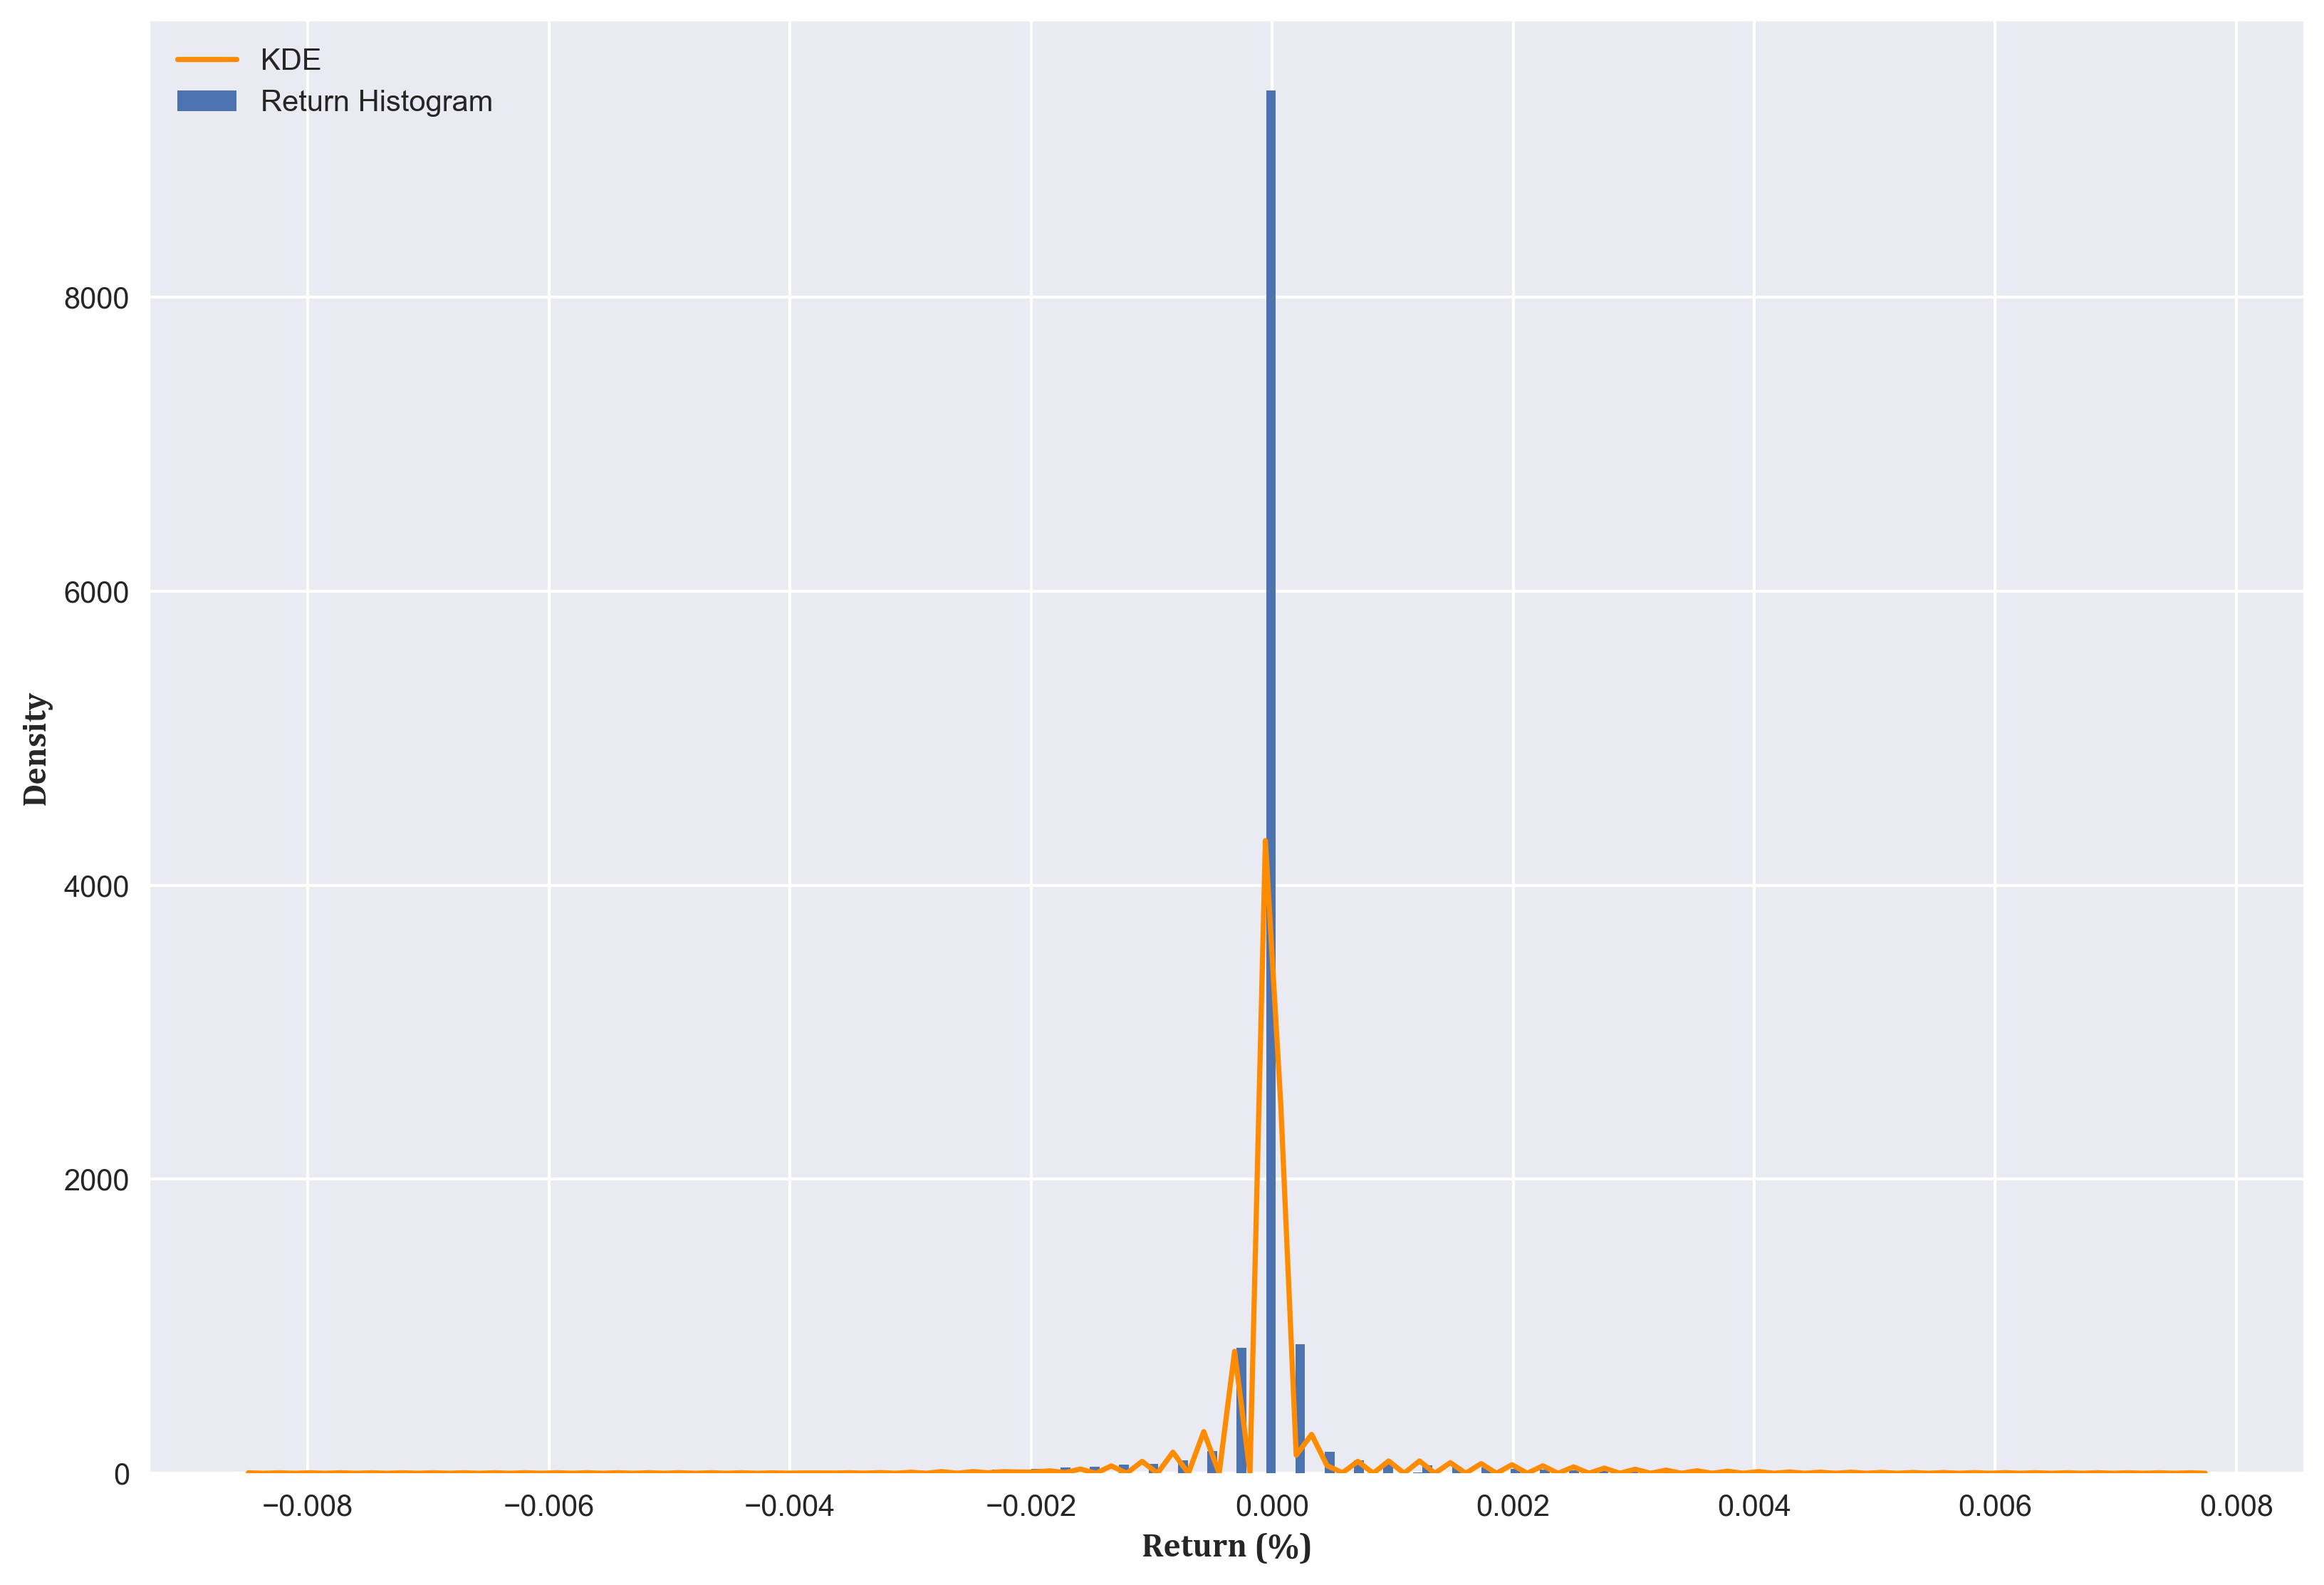

In [34]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.hist(last_df.ret[1:], bins=200, normed=True, label='Return Histogram')
sns.kdeplot(last_df.ret[1:], ax=ax1, linestyle='solid', marker='None', color='DarkOrange', label='KDE')
ax1.set_xlabel('Return (%)', family='Cambria')
ax1.set_ylabel('Density', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%sretdistq.png' % chartdir)
plt.show()

In [35]:
indf2 = pd.read_hdf(h5in, 'qtl')
indf2

,lambda_t,qt_take
0,-100.000000,0.500
1,-381.571037,0.499
2,-663.142075,0.498
3,-381.571037,0.499
...,...,...
99997,-944.713112,0.497
99998,-663.142075,0.498
99999,-381.571037,0.499
100000,-663.142075,0.498


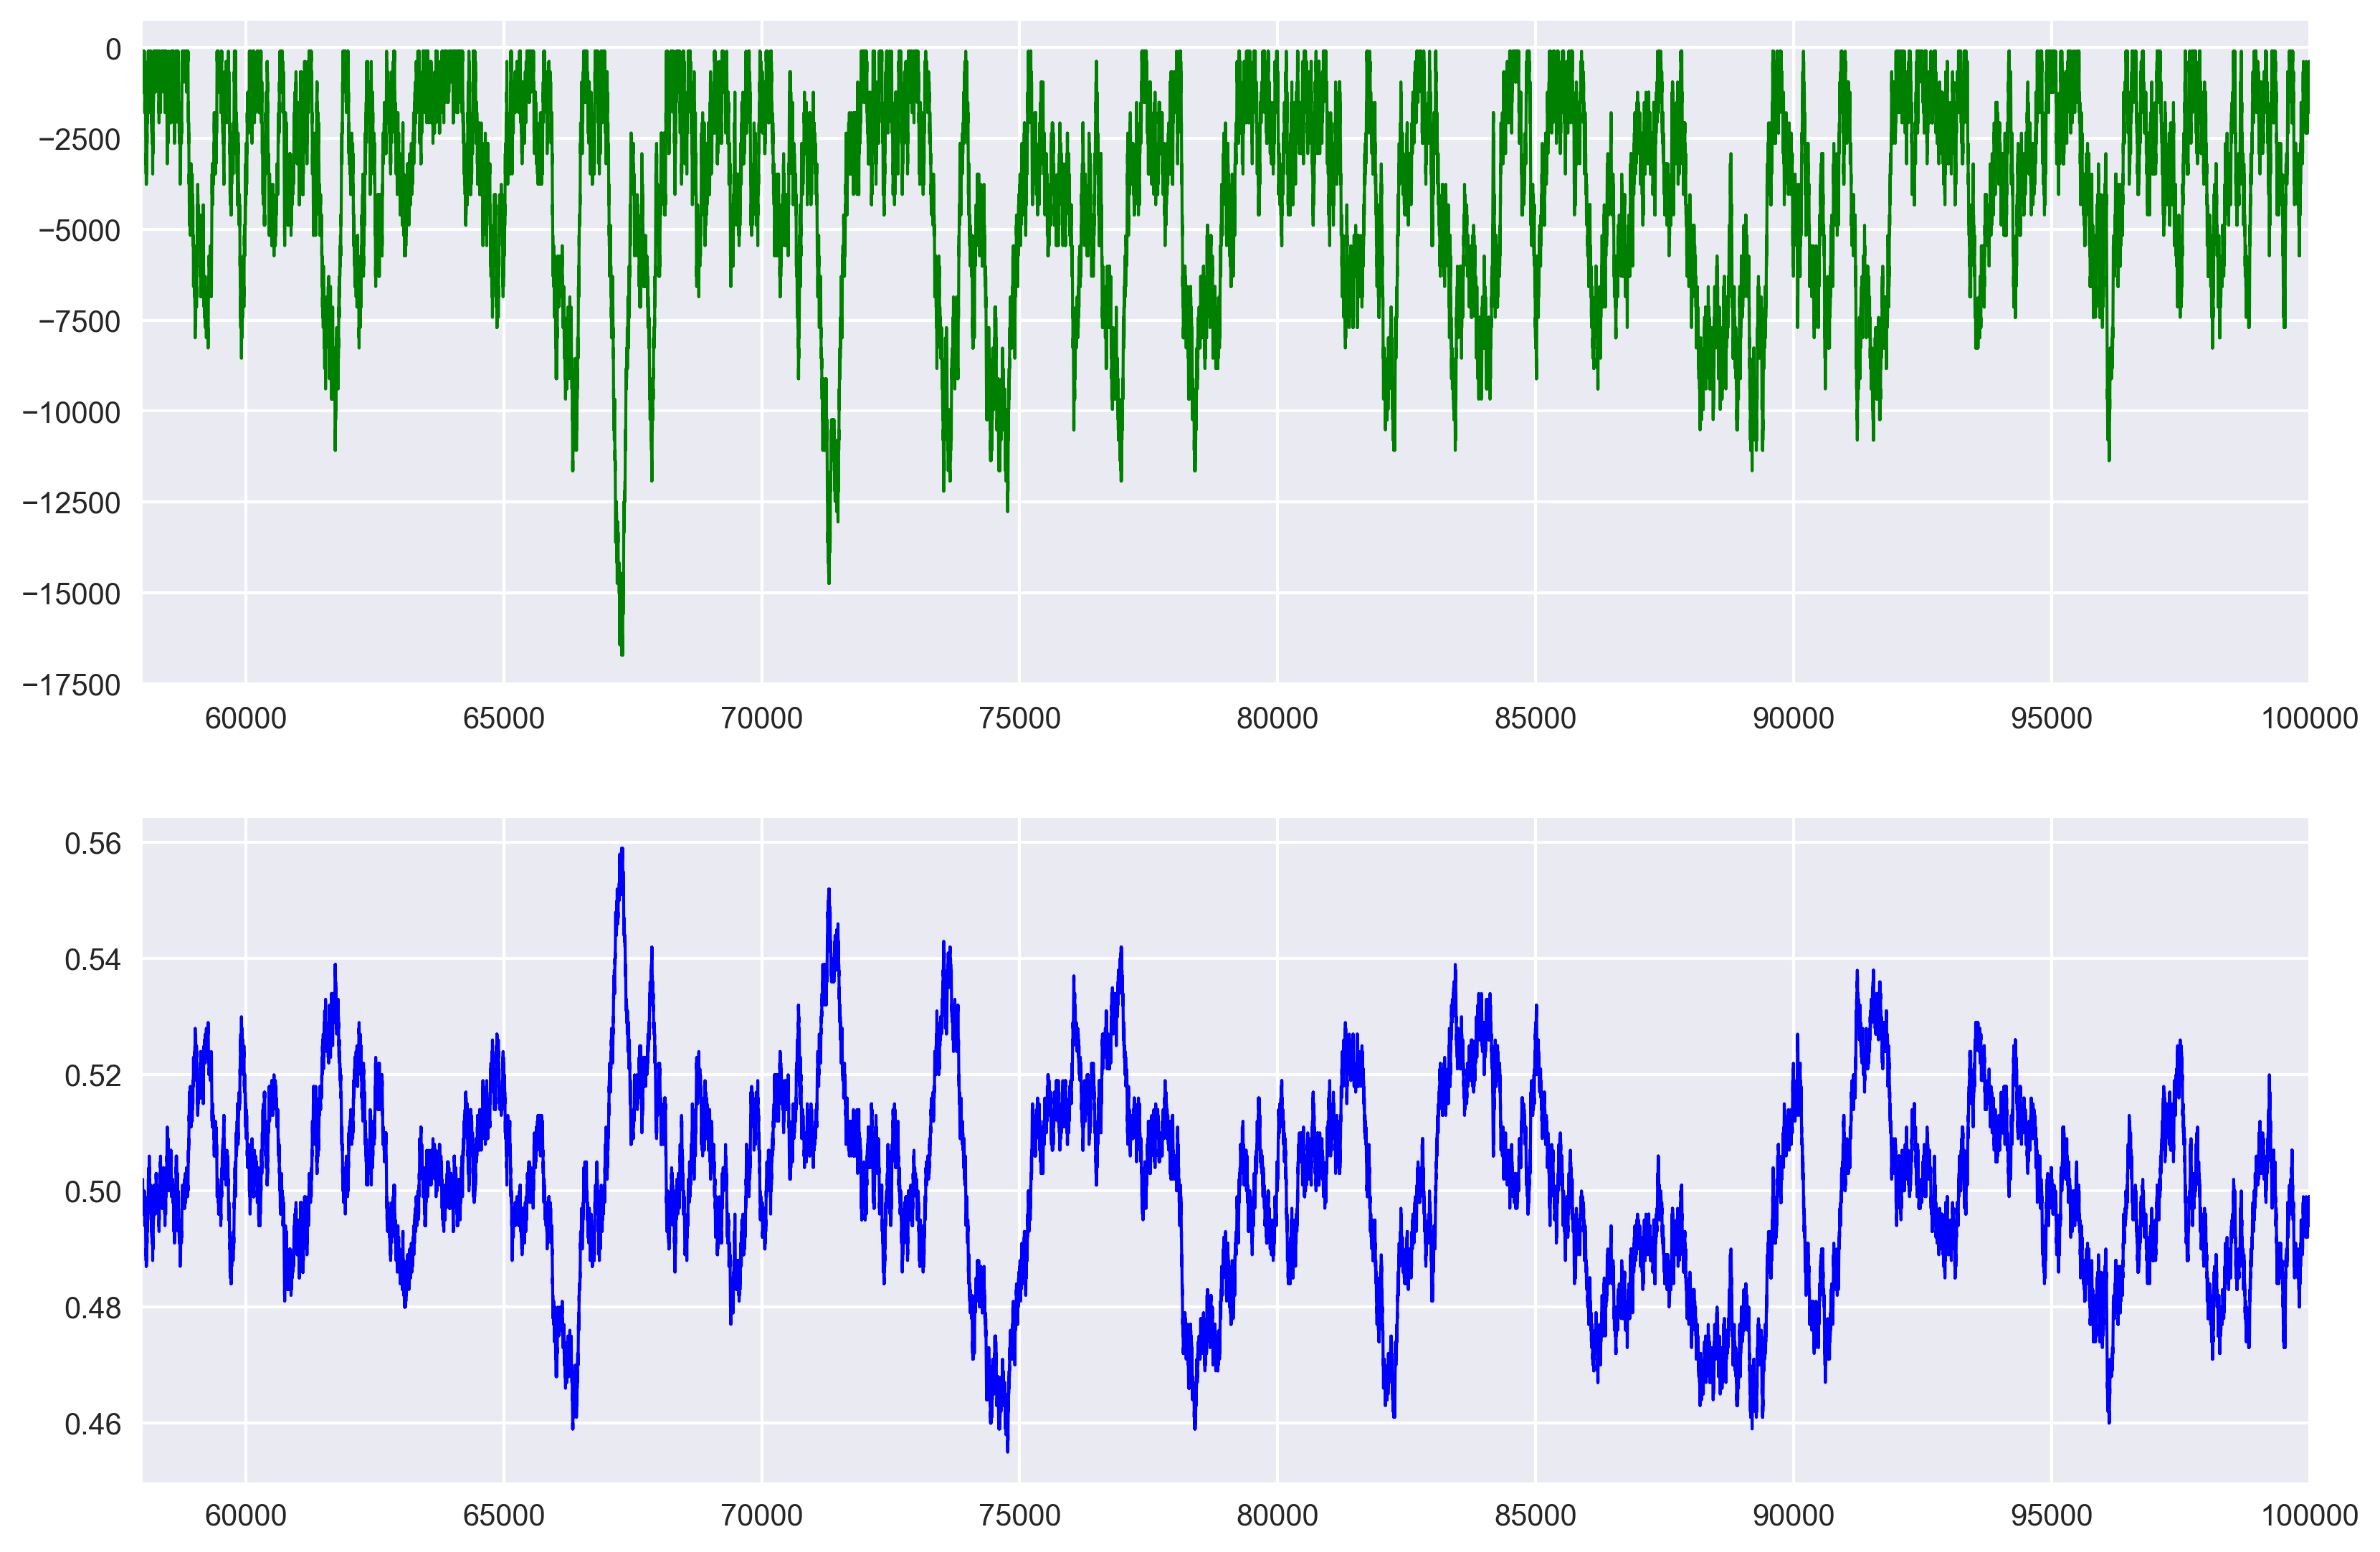

In [38]:
indf2_plot = indf2.loc[58000:100000]
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(211)
sns.tsplot(indf2_plot.lambda_t, ax=ax1, time=indf2_plot.index, color='Green', lw=1)
ax2 = fig.add_subplot(212)
sns.tsplot(indf2_plot.qt_take, ax=ax2, time=indf2_plot.index, color='Blue', lw=1)
fig.savefig('%slambda.png' % chartdir)
plt.show()

In [37]:
indf2.describe()

,lambda_t,qt_take
count,100001.000000,100001.000000
mean,-4101.979818,0.501209
std,3019.631849,0.017764
min,-18683.688470,0.434000
25%,-6012.991786,0.489000
50%,-3478.852449,0.501000
75%,-1789.426225,0.513000
max,-100.000000,0.559000


In [44]:
indf2[indf2.qt_take>0.5].count() - indf2[indf2.qt_take<0.5].count()

lambda_t    6054
qt_take     6054
dtype: int64